# Image Classification using Transfer Learning

In this project we will make image classification using Transfer Learning. For this purpose we will use the InceptionResNetV2 model which is trained on the imageNet data set. Lets use a submarine image for classification. I found this image in Internet, this image is not included in imageNet dataset which was used for training InceptionResNetV2.

In transfer learning we use a model that has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. 

Inception and ResNet have been among the best image recognition performance models in recent years, with very good performance at a relatively low computational cost. Inception and ResNet combines the Inception architecture, with residual connections.

In [1]:
import numpy as np
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
from IPython.display import Image as show_image  # For displaying our test images to you
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions


#### The InceptionResNetV2 pre-trained model expects inputs of 299x299 resolution.  
##### InceptionResNetV2 model will classify images into one of 1,000 possible categories.



In [3]:
# Let's load our image and rescale it to the resolution of 299x299 which InceptionResNetV2 requires..
img = Image.open("submarine.jpg").resize((299,299))


In [4]:
# We must convert it to array for operations...
img = np.array(img)

In [5]:
# Let's look it's shape..
img.shape

(299, 299, 3)

In [6]:
print(img.ndim)

3


In [7]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,299,299,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [8]:
# Let's look it's shape..
img.shape


(1, 299, 299, 3)

In [9]:
print(img.ndim)

4


In [10]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# InceptionResNetV2 model requires it..
img = preprocess_input(img)   

Let's load up the model itself:

In [11]:
incresv2_model = InceptionResNetV2(weights='imagenet', classes=1000)   # InceptionResNetV2 will classify images into one of 
                                                                       # 1,000 possible categories.

#### Lets inspect InceptionResNetV2 model

In [12]:
# Now look at it's layers:
print(incresv2_model.summary())
print(type(incresv2_model))


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

__________________________________________________________________________________________________
block35_4 (Lambda)              (None, 35, 35, 320)  0           block35_3_ac[0][0]               
                                                                 block35_4_conv[0][0]             
__________________________________________________________________________________________________
block35_4_ac (Activation)       (None, 35, 35, 320)  0           block35_4[0][0]                  
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 35, 35, 32)   10240       block35_4_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_39 (BatchNo (None, 35, 35, 32)   96          conv2d_39[0][0]                  
__________________________________________________________________________________________________
activation

batch_normalization_90 (BatchNo (None, 17, 17, 160)  480         conv2d_90[0][0]                  
__________________________________________________________________________________________________
activation_90 (Activation)      (None, 17, 17, 160)  0           batch_normalization_90[0][0]     
__________________________________________________________________________________________________
conv2d_88 (Conv2D)              (None, 17, 17, 192)  208896      block17_3_ac[0][0]               
__________________________________________________________________________________________________
conv2d_91 (Conv2D)              (None, 17, 17, 192)  215040      activation_90[0][0]              
__________________________________________________________________________________________________
batch_normalization_88 (BatchNo (None, 17, 17, 192)  576         conv2d_88[0][0]                  
__________________________________________________________________________________________________
batch_norm

                                                                 activation_131[0][0]             
__________________________________________________________________________________________________
block17_14_conv (Conv2D)        (None, 17, 17, 1088) 418880      block17_14_mixed[0][0]           
__________________________________________________________________________________________________
block17_14 (Lambda)             (None, 17, 17, 1088) 0           block17_13_ac[0][0]              
                                                                 block17_14_conv[0][0]            
__________________________________________________________________________________________________
block17_14_ac (Activation)      (None, 17, 17, 1088) 0           block17_14[0][0]                 
__________________________________________________________________________________________________
conv2d_133 (Conv2D)             (None, 17, 17, 128)  139264      block17_14_ac[0][0]              
__________

conv2d_187 (Conv2D)             (None, 8, 8, 192)    399360      block8_6_ac[0][0]                
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 8, 8, 256)    172032      activation_189[0][0]             
__________________________________________________________________________________________________
batch_normalization_187 (BatchN (None, 8, 8, 192)    576         conv2d_187[0][0]                 
__________________________________________________________________________________________________
batch_normalization_190 (BatchN (None, 8, 8, 256)    768         conv2d_190[0][0]                 
__________________________________________________________________________________________________
activation_187 (Activation)     (None, 8, 8, 192)    0           batch_normalization_187[0][0]    
__________________________________________________________________________________________________
activation

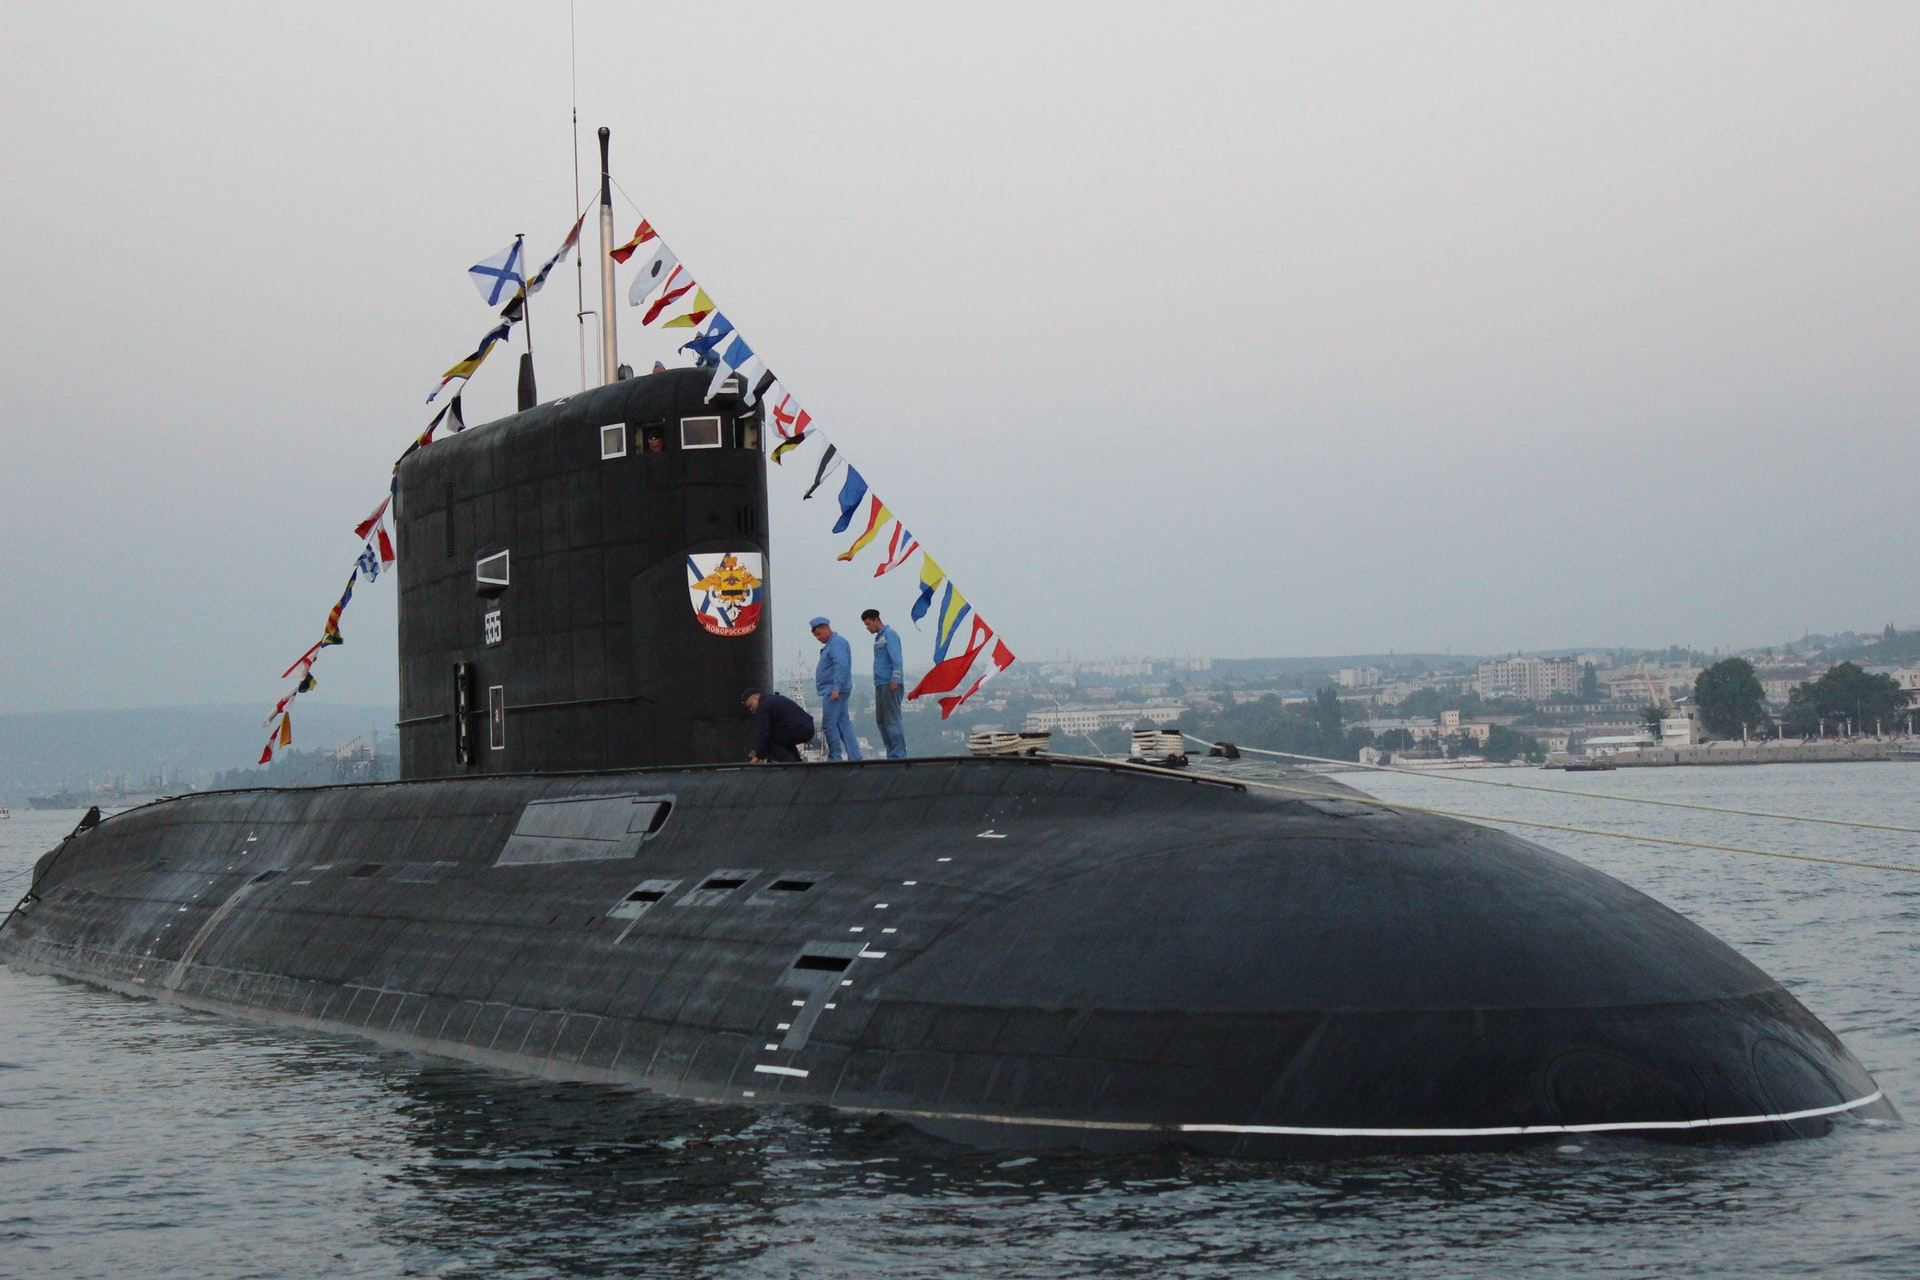

In [13]:
# Before prediction let's see our image with our eyes first:
show_image(filename='submarine.jpg') 

It's already trained with weights learned from the Imagenet data set. Now we will use it by calling incresv2_model's predict() method:

In [14]:
preds = incresv2_model.predict(img)
print('Predicted categories:', decode_predictions(preds, top=2)[0]) # decode the results into a list of tuples 

Predicted categories: [('n04347754', 'submarine', 0.9731439), ('n04049303', 'rain_barrel', 0.00015625733)]


### Lets make another prediction.. I downloaded all these images from the web. These images are not in ImageNet. you can try yourself, download any image from the web and make a prediction using the model...

### reshape

In [32]:
import numpy as np

arr = np.arange(24)

print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [33]:
arr.shape

(24,)

In [34]:
arr.ndim

1

As you can see above array arr has only 1 dimension. It is the simplest array since it has the min possible dimension size:1..

### Increasing the dimension size of a numpy array using reshape(-1,..)

In [35]:
arr = arr.reshape(-1,24) #We added an extra dimension to array a with reshape(-1,24)

In [36]:
arr.shape

(1, 24)

In [39]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23]])

In [38]:
arr.ndim

2

As you can see above we have increased the dimension of our array arr. Now it is 2 dimensional... Original values have become the first row now!